In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import path
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import numpy as np
import netCDF4 as nc
np.set_printoptions(threshold=100000)
from shapely.geometry import Polygon, Point, MultiPoint
from shapely.ops import cascaded_union, unary_union, transform
from datetime import datetime, timedelta
import datetime
import math
from scipy.ndimage.interpolation import shift
import shapely.wkt
from shapely.validation import explain_validity,make_valid
import xarray as xr
import pygeos as pg
import time
import seaborn as sns
from my_functions import sat_vap_press, vap_press, hot_dry_windy, haines

In [2]:
vpd_old = xr.open_dataset('/data2/lthapa/ML_daily/pygraf/processed_hrrr/Processed_HRRR_2020103123.nc')
vpd_new = xr.open_dataset('/data2/lthapa/ML_daily/pygraf/Processed_HRRR_2020103123_HDW_HWP.nc')

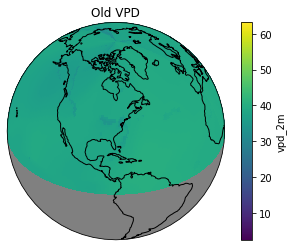

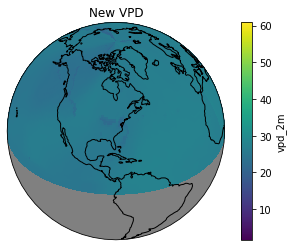

In [13]:
p = vpd_old.vpd_2m.plot(
    subplot_kws=dict(projection=ccrs.Orthographic(-80, 35), facecolor="gray"),
    transform=ccrs.PlateCarree(),
)
p.axes.set_global()
p.axes.coastlines()
plt.title('Old VPD')
plt.show()

p = vpd_new.vpd_2m.plot(
    subplot_kws=dict(projection=ccrs.Orthographic(-80, 35), facecolor="gray"),
    transform=ccrs.PlateCarree(),
)
p.axes.set_global()
p.axes.coastlines()
plt.title('New VPD')

plt.show()

In [14]:
print(vpd_old.vpd_2m.values)

[[28.70071277 28.70080726 28.80932239 ... 39.14943589 39.14941637
  39.14935778]
 [28.70078836 28.70092062 28.70093951 ... 39.14955305 39.14953353
  39.14943589]
 [28.70078836 28.70092062 28.7009773  ... 39.14961162 39.14957258
  39.14947494]
 ...
 [16.95131149 16.95132978 16.88309649 ...  7.5325604   7.56604196
   7.59961836]
 [16.95132978 16.88309649 16.88311477 ...  7.53257767  7.56605923
   7.56602469]
 [16.8830782  16.88309649 16.88311477 ...  7.53254313  7.56602469
   7.56600741]]


In [15]:
print(vpd_new.vpd_2m.values)

[[20.98919861 21.0215749  21.13730711 ... 26.5740831  26.56751801
  26.54781414]
 [21.01509945 21.06042044 21.06689445 ... 26.61348415 26.60691906
  26.5740831 ]
 [21.01509945 21.06042044 21.07984154 ... 26.6331823  26.6200502
  26.58721806]
 ...
 [10.37602652 10.38186968 10.32010191 ...  5.71821978  5.75170245
   5.77228779]
 [10.38251389 10.32074564 10.3265888  ...  5.72464361  5.75794985
   5.74510052]
 [10.31490343 10.32074564 10.32723206 ...  5.71161785  5.74510052
   5.73867573]]


august_complex


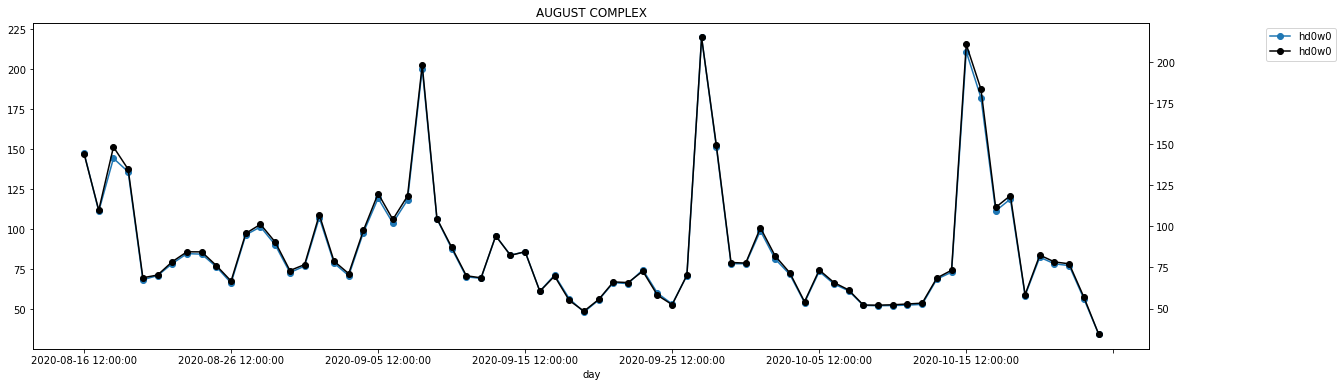

bobcat


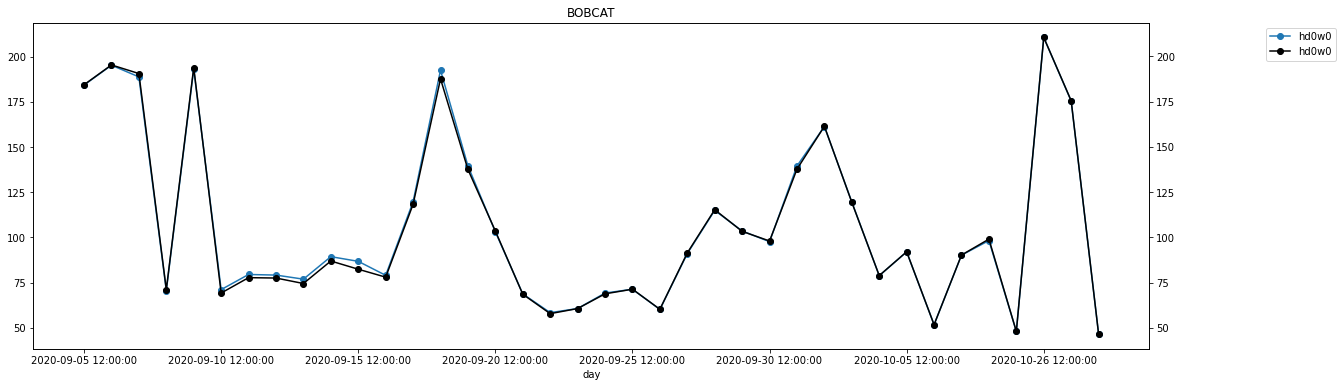

dolan


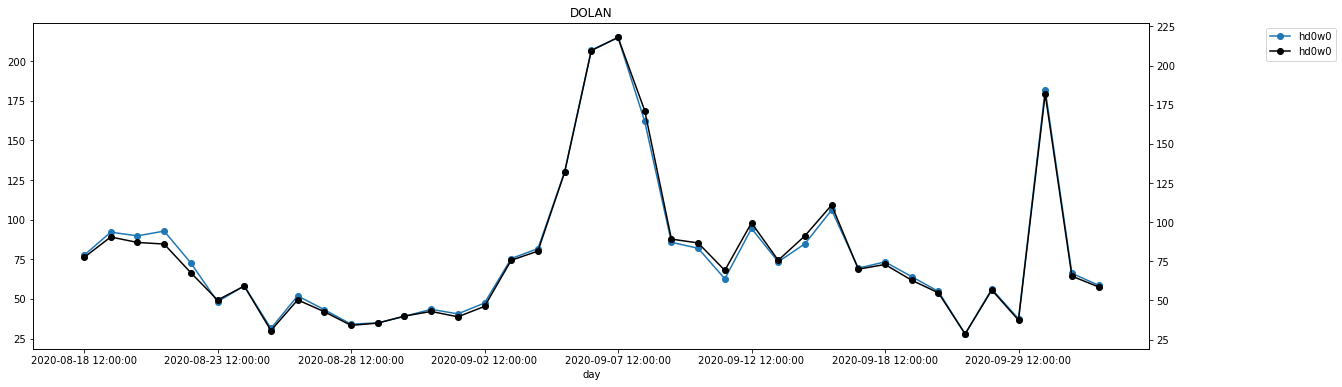

holiday_farm


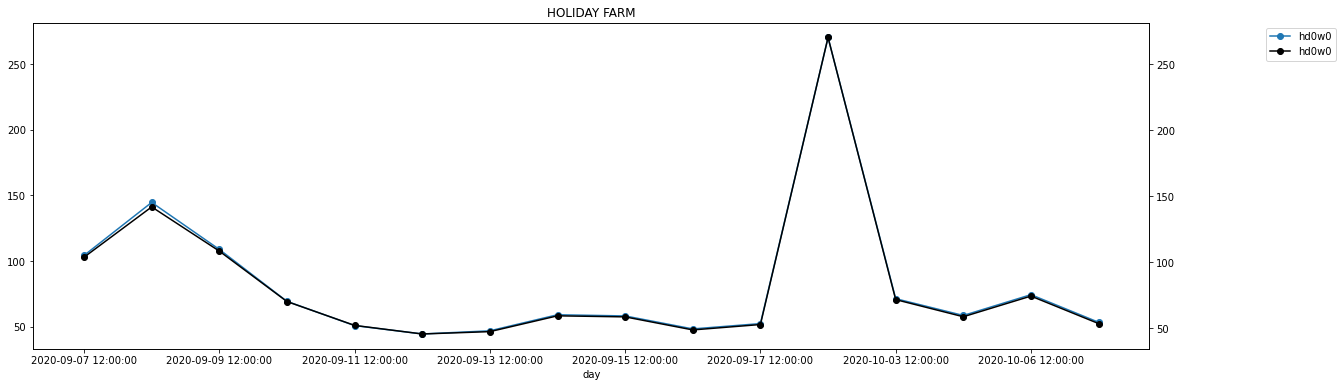

creek


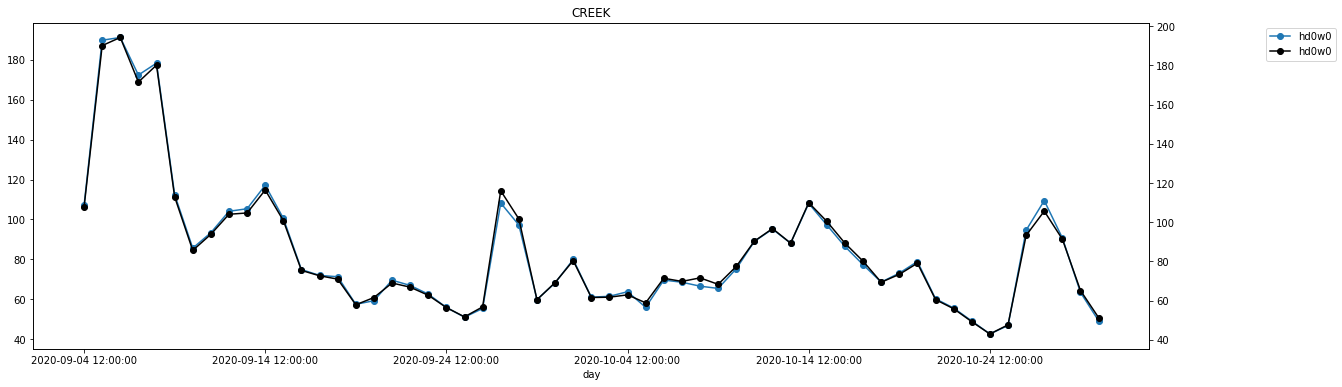

lake


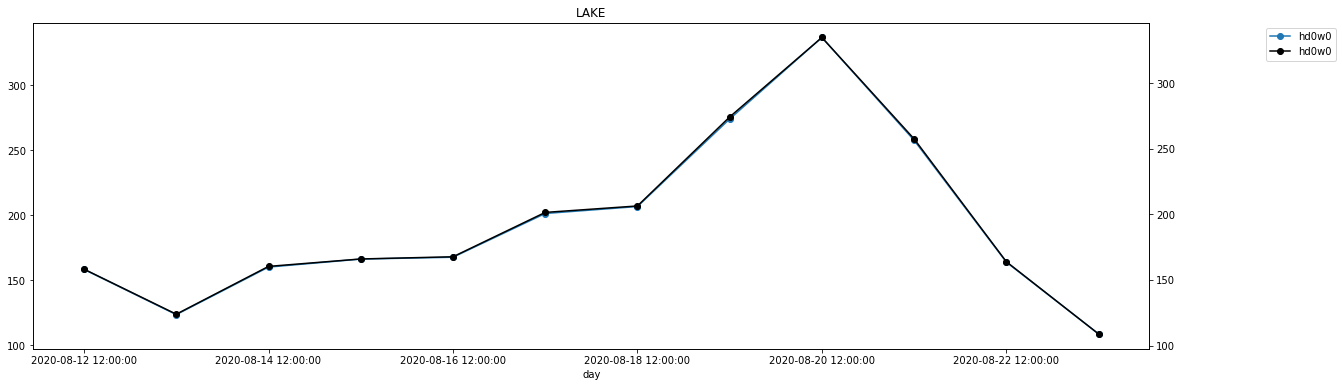

cameron_peak


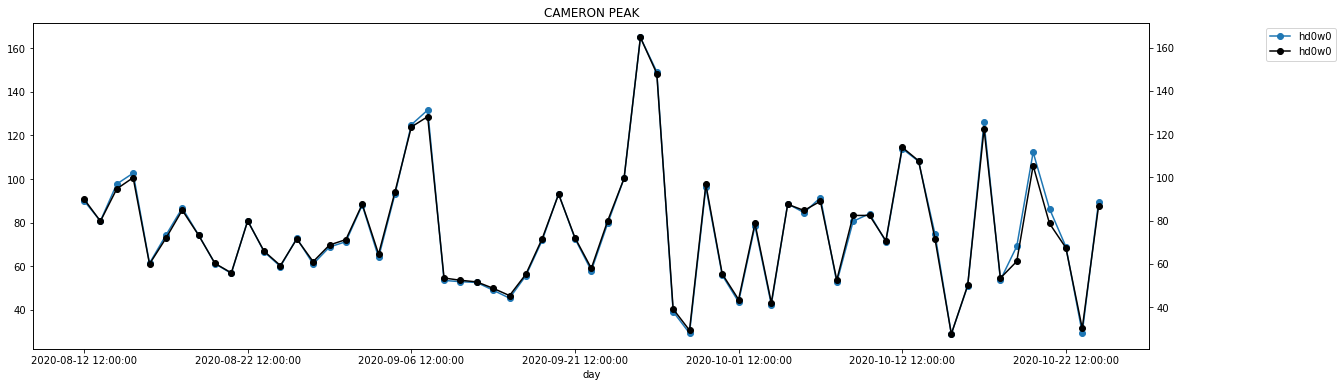

pine_gulch


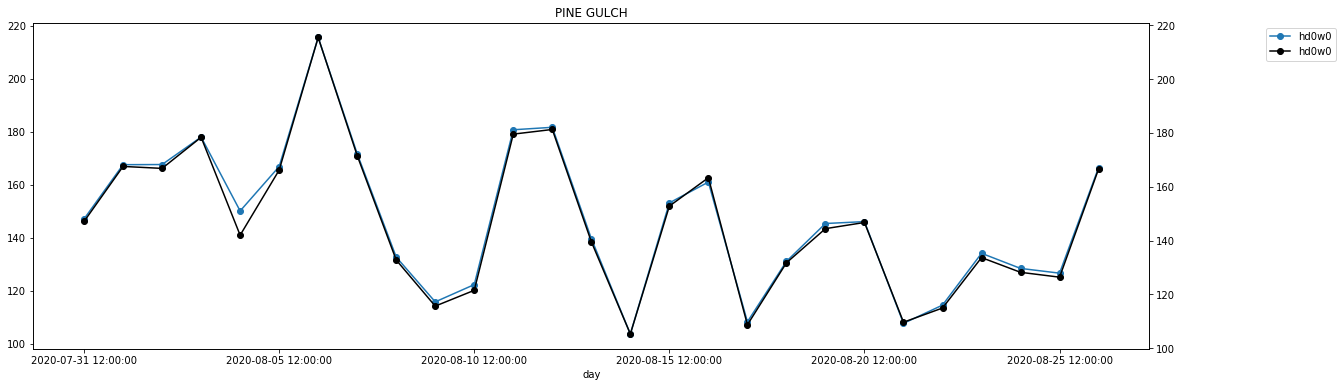

east_troublesome


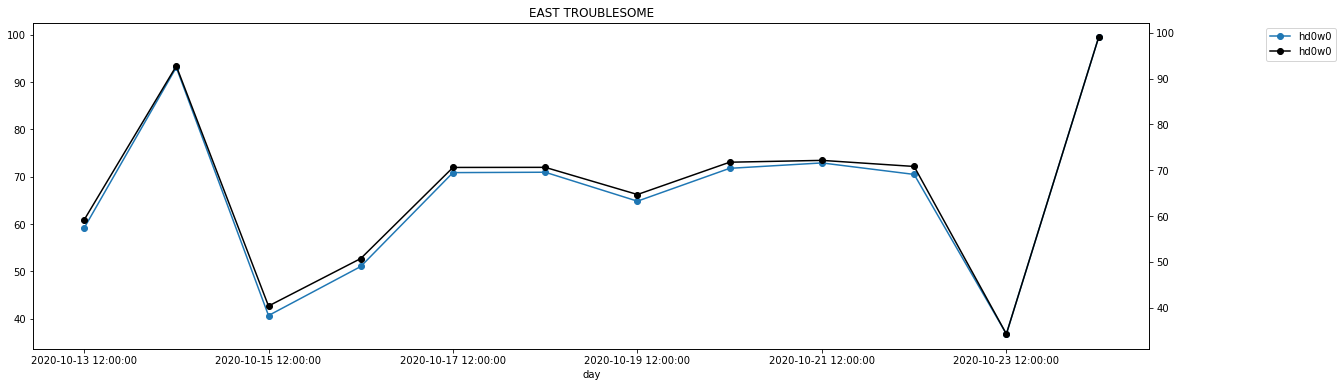

In [19]:
incidents = ['AUGUST COMPLEX','BOBCAT', 'DOLAN', 'HOLIDAY FARM','CREEK', 'LAKE', 'CAMERON PEAK', 'PINE GULCH','EAST TROUBLESOME']

path_features='/data2/lthapa/ML_daily/fire_features/'
start_time=12
for ii in range(len(incidents)):
        file_prefix = incidents[ii].lower().replace(' ', '_')
        print(file_prefix)

        #load in the data
        hrrr_ws = pd.read_csv(path_features+file_prefix+'_Daily_HRRR_ws_'+str(start_time)+'Z_day_start.csv')
        hrrr_hdw2 = pd.read_csv(path_features+file_prefix+'_Daily_HRRR_HDW2_'+str(start_time)+'Z_day_start.csv')
        
        #print(hrrr_ws['hd0w0'])
        
        fig, ax = plt.subplots(figsize=(20,15)) 
        hrrr_ws.plot(x='day', y=['hd0w0'],
                                figsize=(20,6),style='o-',ax=ax )
        hrrr_hdw2.plot(x='day', y=['hd0w0'],secondary_y=True,
                                figsize=(20,6),style='ko-',ax=ax )

        h1, l1 = ax.get_legend_handles_labels()
        h2, l2 = ax.right_ax.get_legend_handles_labels()
        ax.legend(h1+h2, l1+l2,bbox_to_anchor=(1.1, 1), loc='upper left')
        plt.title(incidents[ii])
        plt.show()